```{contents}
```
## Monitoring

**Monitoring** in LangGraph is the discipline of **observing, measuring, and controlling the behavior of LLM workflows in real time and historically** to ensure correctness, performance, safety, cost efficiency, and reliability in production systems.

LangGraph workflows are **long-running, stateful, and autonomous**, which makes monitoring **mandatory**, not optional.

---

### **1. Why Monitoring Is Essential in LangGraph**

Traditional APIs are short-lived and stateless.
LangGraph graphs are **state machines** that:

* loop,
* branch,
* call tools,
* involve multiple agents,
* persist state,
* and may run for minutes or hours.

Monitoring ensures:

| Risk            | What Monitoring Prevents          |
| --------------- | --------------------------------- |
| Infinite loops  | Runaway cost and resource burn    |
| Silent failures | Corrupted state & wrong decisions |
| Latency spikes  | Poor user experience              |
| Agent conflicts | Unstable outputs                  |
| Tool misuse     | Security incidents                |
| Cost overruns   | Uncontrolled spending             |

---

### **2. What Exactly Is Monitored**

LangGraph exposes multiple **monitoring layers**.

| Layer           | Examples of Metrics                     |
| --------------- | --------------------------------------- |
| Graph execution | step count, node frequency, transitions |
| State evolution | state diff, version history             |
| LLM behavior    | tokens, latency, model selection        |
| Agent behavior  | delegation, conflicts, retries          |
| Tool usage      | calls, failures, execution time         |
| System health   | memory, CPU, concurrency                |
| Cost            | token spend, per-run budget             |

---

### **3. Monitoring Architecture**

```
LangGraph Runtime
    |
    +-- Execution Traces
    +-- State Snapshots
    +-- Node Metrics
    +-- Tool Logs
    +-- Error Logs
    |
Monitoring Pipeline
    |
Tracing Store  →  Visualization UI
Metrics Store  →  Alerts
Log Store      →  Debugging
```

Common stacks:

* **LangSmith** (native)
* **OpenTelemetry**
* **Prometheus + Grafana**
* **ELK Stack**

---

### **4. Native Monitoring with LangSmith**

LangGraph integrates directly with **LangSmith**.

```python
import os
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = "<your_key>"
```

Then run any graph:

```python
result = graph.invoke(input_data)
```

LangSmith automatically captures:

* graph topology
* every node execution
* state changes
* LLM calls
* tool calls
* errors and retries
* latency and token usage

---

### **5. Monitoring Cycles & Loops**

Critical for cyclic graphs:

| Metric          | Purpose                 |
| --------------- | ----------------------- |
| Recursion depth | Detect infinite loops   |
| Iteration count | Measure convergence     |
| State delta     | Check learning progress |
| Loop duration   | Performance analysis    |

```python
graph.invoke(input, config={"recursion_limit": 30})
```

---

### **6. Real-Time Alerts & Safeguards**

| Trigger               | Alert                  |
| --------------------- | ---------------------- |
| Recursion limit hit   | Infinite loop detected |
| Tool failure spike    | Tool degradation       |
| Token budget exceeded | Cost overrun           |
| Latency threshold     | Performance issue      |
| Agent disagreement    | Decision instability   |

---

### **7. Example: Custom Node-Level Monitoring**

```python
def monitored_node(state):
    start = time.time()
    result = do_work(state)
    latency = time.time() - start
    print(f"Node latency: {latency}")
    return result
```

This integrates with external APM systems.

---

### **8. Production Monitoring Checklist**

| Area                | Required |
| ------------------- | -------- |
| Execution tracing   | ✔        |
| State checkpoints   | ✔        |
| Error & retry logs  | ✔        |
| Cost tracking       | ✔        |
| Performance metrics | ✔        |
| Alerting            | ✔        |
| Visualization       | ✔        |
| Audit trails        | ✔        |

---

### **9. Mental Model**

Monitoring in LangGraph treats the AI system as a **distributed autonomous service**:

> **Observe → Measure → Diagnose → Correct**

Without monitoring, a LangGraph system is **blind**.


### Demonstration

[increment_node] count=1 | latency=0.0000s
[increment_node] count=2 | latency=0.0000s
[increment_node] count=3 | latency=0.0000s
[increment_node] count=4 | latency=0.0000s
[increment_node] count=5 | latency=0.0000s

Final Result: {'count': 5, 'done': True}


Failed to send compressed multipart ingest: langsmith.utils.LangSmithAuthError: Authentication failed for https://api.smith.langchain.com/runs/multipart. HTTPError('401 Client Error: Unauthorized for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Unauthorized"}\n')trace=019b6dfb-f544-7f32-9786-e861ea28fd1a,id=019b6dfb-f544-7f32-9786-e861ea28fd1a; trace=019b6dfb-f544-7f32-9786-e861ea28fd1a,id=019b6dfb-f54e-7a03-aa61-9d21c5f44766; trace=019b6dfb-f544-7f32-9786-e861ea28fd1a,id=019b6dfb-f550-76a3-bd64-3a5de1567a0c; trace=019b6dfb-f544-7f32-9786-e861ea28fd1a,id=019b6dfb-f550-76a3-bd64-3a5de1567a0c; trace=019b6dfb-f544-7f32-9786-e861ea28fd1a,id=019b6dfb-f54e-7a03-aa61-9d21c5f44766; trace=019b6dfb-f544-7f32-9786-e861ea28fd1a,id=019b6dfb-f551-7b51-b432-df3e5b758715; trace=019b6dfb-f544-7f32-9786-e861ea28fd1a,id=019b6dfb-f552-79a2-a516-1bbc213a76f5; trace=019b6dfb-f544-7f32-9786-e861ea28fd1a,id=019b6dfb-f552-79a2-a516-1bbc213a76f5; trace=019b6dfb-f544-7f32-9786-e861ea28fd1a,id

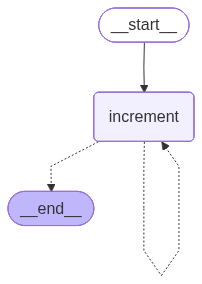

In [3]:
# =======================
# LangGraph Monitoring Demo (Single Cell)
# =======================

import os, time
from typing import TypedDict
from langgraph.graph import StateGraph, END

# ---- Enable native tracing (LangSmith) ----
os.environ["LANGCHAIN_TRACING_V2"] = "true"
# os.environ["LANGCHAIN_API_KEY"] = "YOUR_API_KEY"  # Optional for LangSmith UI

# ---- Define state ----
class State(TypedDict):
    count: int
    done: bool

# ---- Monitored node ----
def increment_node(state: State) -> State:
    start = time.time()
    
    new_count = state["count"] + 1
    result = {"count": new_count, "done": new_count >= 5}
    
    latency = time.time() - start
    print(f"[increment_node] count={new_count} | latency={latency:.4f}s")
    
    return result

# ---- Router with safety ----
def router(state: State):
    if state["done"]:
        return END
    return "increment"

# ---- Build graph ----
builder = StateGraph(State)
builder.add_node("increment", increment_node)

builder.set_entry_point("increment")
builder.add_conditional_edges("increment", router, {
    "increment": "increment",
    END: END
})

graph = builder.compile()

# ---- Execute with recursion guard ----
result = graph.invoke(
    {"count": 0, "done": False},
    config={"recursion_limit": 10}
)

print("\nFinal Result:", result)

# ---- Visualize graph ----
from IPython.display import Image
display(Image(graph.get_graph().draw_mermaid_png()))
